In [1]:
import pandas as pd
import requests
import numpy as np
import json
from pymongo import MongoClient
import matplotlib.pyplot as plt

In [2]:
# load csv files from both makeup results or initial data
df_suicide = pd.read_csv('Resources/suicide_rates.csv')
df_happy_2015 = pd.read_csv('Output/happiness_2015.csv')
df_happy_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,code,population,area
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,CHE,8341600,41284
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,ISL,334300,103000
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,DNK,5717014,43094
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NOR,5223256,323802
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,CAN,36155487,9984670


In [3]:
# use the first data to get 2015's data and find the total countries in this data
suicide_2015_first = df_suicide.loc[(df_suicide['year'] == 2015),:]
suicide_2015_group = suicide_2015_first.groupby('country').suicides_no\
                    .agg('sum')
suicide_2015_group.shape[0]

62

In [4]:
# load csv files in the second data and rename and drop the unnecessary columns 
# and find the total countries in 2015
df_sui_data = pd.read_csv('Resources/suicide_data.csv')
column = {'Unnamed: 0': 'Country', 'Unnamed: 1': 'sex',
           'Crude suicide rates (per 100 000 population)': '2016',
           'Crude suicide rates (per 100 000 population).1': '2015'}
df_sui_data = df_sui_data.rename(columns = column)
drop_columns = ['Crude suicide rates (per 100 000 population).2',
                'Crude suicide rates (per 100 000 population).3', 
                'Crude suicide rates (per 100 000 population).4']
df_sui_data = df_sui_data.drop(index = 0, columns = drop_columns).reset_index()
df_sui_data = df_sui_data.loc[df_sui_data['sex'] == 'Both sexes',:].reset_index()
df_sui_data = df_sui_data.drop(columns = ['index', 'sex','level_0'])
df_sui_data.shape[0]

183

In [5]:
# merge the happiness dataframe and the second suicide data and found the gap of countries
merged_initial = pd.merge(df_happy_2015, df_sui_data, how = 'left', on = 'Country')
merged_initial_2015 = merged_initial.drop(columns = ['2016']).set_index('Country')
merged_initial_2015[merged_initial_2015.isna().any(axis = 1)].shape[0]

24

In [6]:
# use an api called restcountry to find the code of the country for dataframe happiness
# final_dict = {'United State': 1, 'Ireland': 0, 'Oman': 0, 'China': 0, 'India': 1, 
#               'Sudan': 0, 'Georgia': 0, 'Mali': 0, 'Niger': 0, 'Guinea': 1}
# for i in df_happy_2015.index:
#     try:
#         name = df_happy_2015['Country'][i]
#         url = 'https://restcountries.eu/rest/v2/name/' + name
#         population = requests.get(url).json()
#         population[1]['population']
#         for j in final_dict.keys():
#             if j == name:
#                 correct_num = final_dict[j]
#                 break
#         df_happy_2015['code'][i] = population[correct_num]['alpha3Code']
#         df_happy_2015['population'][i] = population[correct_num]['population']
#         df_happy_2015['area'][i] = population[correct_num]['area']
#     except:
#         try:
#             df_happy_2015['code'][i] = population[0]['alpha3Code']
#             df_happy_2015['population'][i] = population[0]['population']
#             df_happy_2015['area'][i] = population[0]['area']
#         except:
#             df_happy_2015['code'][i] = 'not-found'
#             df_happy_2015['population'][i] = 'not-found'
#             df_happy_2015['area'][i] = 'not-found'
# df_happy_2015
# df_happy_2015.to_csv('Output/happiness_2015.csv', index = False)

In [7]:
# to the similar process to find the code in second suicide data
# df_sui_data['code'] = ''
# multiple_data = {}
# final_sui = {'China': 0, 'Congo': 0, 'Georgia': 0, 'Guinea': 1, 'India': 1,
#              'Ireland': 0, 'Mali': 0, 'Niger': 0, 'Oman': 0, 'Republic of Korea': 0, 
#              'Samoa': 1, 'Sudan': 1}
# for i in df_sui_data.index:
#     try:
#         name = df_sui_data['Country'][i]
#         url = 'https://restcountries.eu/rest/v2/name/' + name
#         population = requests.get(url).json()
#         population[1]['population']
#         for j in final_sui.keys():
#             if j == name:
#                 correct_num = final_sui[j]
#                 break
#         df_sui_data['code'][i] = population[correct_num]['alpha3Code']
#         multiple_data[name] = population
#     except:
#         try:
#             df_sui_data['code'][i] = population[0]['alpha3Code']
#         except:
#             df_sui_data['code'][i] = 'not_found'
# df_sui_data.head()
# df_sui_data.to_csv('Output/suicide_code.csv', index = False)

In [8]:
# load the makeup data to save running time
df_sui_data_code = pd.read_csv('Output/suicide_code.csv')
df_sui_data_code.head()

,Country,2016,2015,code
0,Afghanistan,4.7,4.8,AFG
1,Albania,6.3,6.0,ALB
2,Algeria,3.2,3.2,DZA
3,Angola,4.7,5.0,AGO
4,Antigua and Barbuda,0.5,0.8,ATG


In [9]:
# merge the second one to find the gap
merged_second = pd.merge(df_happy_2015, df_sui_data_code, how = 'left', on = 'code')
merged_second_2015 = merged_second.drop(columns = ['2016', 'Country_y'])\
                    .set_index('code').rename(columns = {'Country_x': 'Country', '2015': 'suicide rate' })
merged_second_2015[merged_second_2015.isna().any(axis = 1)].shape[0]

11

In [10]:
# find the happiness dataframe's gap where there is no data on the api
not_found = df_happy_2015.loc[df_happy_2015['code'] == 'not-found',:]
not_found.shape[0]

6

In [11]:
merged_reset_index = merged_second_2015.reset_index()

In [12]:
# # connect the monogo db
# uri = "mongodb://localhost:27017"
# client = MongoClient(uri)
# db = client.get_database('happinessDB')
# collection = db.secondDB
# # turn the dataframe to json
# json_merged = merged_reset_index.to_json(orient = 'records')
# json_merged = json.loads(json_merged)
# # load the json to mongo db
# for i in json_merged:
#     collection.insert_one(i)

In [13]:
merged_second_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,population,area,suicide rate
code,,,,,,,,,,,,,,,
CHE,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8341600,41284,17.1
ISL,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,334300,103000,14.0
DNK,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5717014,43094,11.9
NOR,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5223256,323802,12.4
CAN,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,36155487,9984670,12.5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([38., 34., 28., 25.,  9.,  7.,  3.,  1.,  0.,  2.]),
 array([ 1.9,  5.2,  8.5, 11.8, 15.1, 18.4, 21.7, 25. , 28.3, 31.6, 34.9]),
 <a list of 10 Patch objects>)

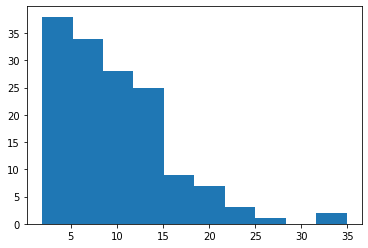

In [14]:
plt.hist(merged_second_2015['suicide rate'])

In [15]:
from scipy.stats import linregress
import seaborn as sb

In [16]:
merged_int_2015 = merged_second_2015.replace('not-found', np.nan)

In [17]:
merged_int_2015['population'] = merged_int_2015['population'].astype('float')
merged_int_2015['area'] = merged_int_2015['area'].astype('float')

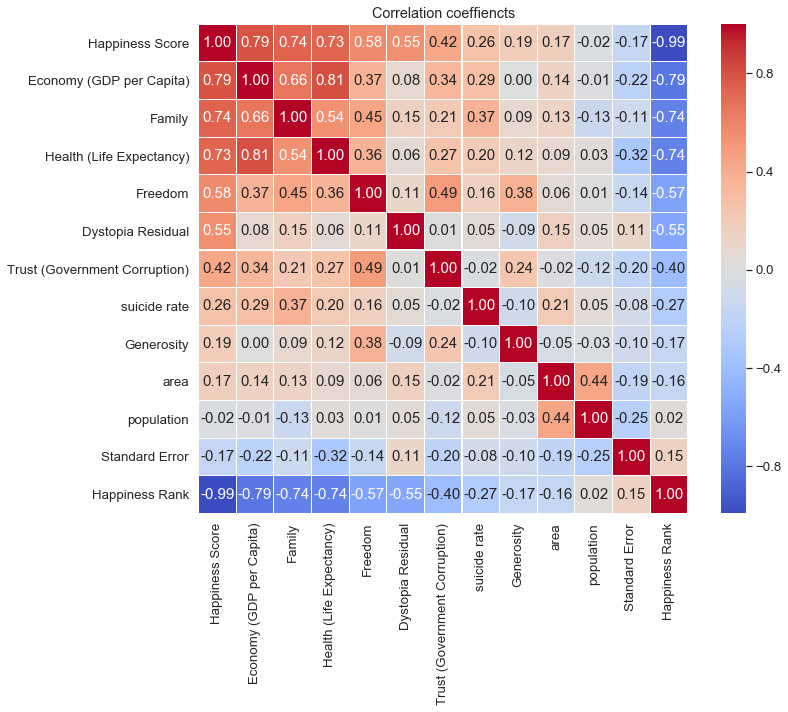

In [18]:
# correlation first as initial
cor_format = merged_int_2015.corr()
# sort correlation around revenue
# here is a bug for plt so there is a cutoff and use ylim to fit it 
# but the order is different so use smallest and invert_xaxis to fix this bug
col_name = cor_format.nsmallest(18, 'Happiness Score')['Happiness Score'].index
# use np to make the list for the correlation
cor_num = np.corrcoef(merged_int_2015[col_name].dropna(how = 'any').values.T)
# making the figures
plt.figure(figsize = (12,9))
sb.set(font_scale = 1.2)
ax = sb.heatmap(cor_num, cbar = True, annot = True, square = True, fmt = '.2f', 
                annot_kws = {'size': 15}, linewidth = 0.1, cmap = 'coolwarm',
                yticklabels = col_name.values, xticklabels = col_name.values)
plt.title("Correlation coeffiencts")
ax.invert_xaxis()
plt.ylim(0,len(cor_num))
plt.show()

In [19]:
happy_std = merged_int_2015